## Business Case:Develop a predictive model that accurately estimates a student's salary based on their CGPA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import pandas as pd

data = {
    'cgpa': [3.5, 3.8, 3.9, 4.0, 4.2],
    'salary': [50000, 60000, 70000, 80000, 90000]
}

df = pd.DataFrame(data)

In [4]:
df.head()

,cgpa,salary
0,3.5,50000
1,3.8,60000
2,3.9,70000
3,4.0,80000
4,4.2,90000


### Model1 =Average Model

In [5]:
df['pred1'] = df['salary'].mean()
     

In [6]:
df.head()

,cgpa,salary,pred1
0,3.5,50000,70000.0
1,3.8,60000,70000.0
2,3.9,70000,70000.0
3,4.0,80000,70000.0
4,4.2,90000,70000.0


In [7]:
#calculate the error/residue
df['err1'] = df['salary'] - df['pred1']

In [8]:
df.head()

,cgpa,salary,pred1,err1
0,3.5,50000,70000.0,-20000.0
1,3.8,60000,70000.0,-10000.0
2,3.9,70000,70000.0,0.0
3,4.0,80000,70000.0,10000.0
4,4.2,90000,70000.0,20000.0


### Model_2 =  DecisionTree

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
     

tree1.fit(df['cgpa'].values.reshape(5,1),df['err1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

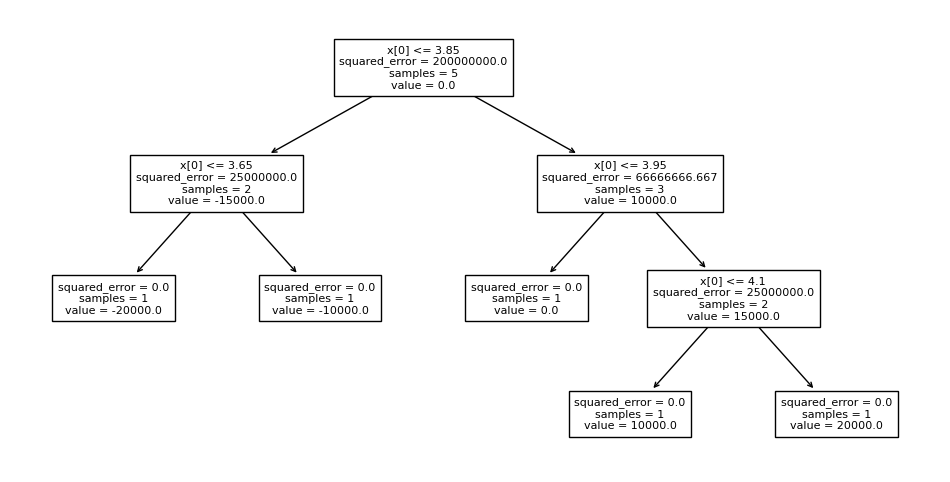

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree1,fontsize=(8))

plt.show()

In [21]:
df['pred2'] = 70000 +0.1* tree1.predict(df['cgpa'].values.reshape(5,1))

In [22]:
df.head()

,cgpa,salary,pred1,err1,pred2
0,3.5,50000,70000.0,-20000.0,68000.0
1,3.8,60000,70000.0,-10000.0,69000.0
2,3.9,70000,70000.0,0.0,70000.0
3,4.0,80000,70000.0,10000.0,71000.0
4,4.2,90000,70000.0,20000.0,72000.0


In [23]:
df['err2'] = df['salary'] - df['pred2']

In [24]:
df.head()

,cgpa,salary,pred1,err1,pred2,err2
0,3.5,50000,70000.0,-20000.0,68000.0,-18000.0
1,3.8,60000,70000.0,-10000.0,69000.0,-9000.0
2,3.9,70000,70000.0,0.0,70000.0,0.0
3,4.0,80000,70000.0,10000.0,71000.0,9000.0
4,4.2,90000,70000.0,20000.0,72000.0,18000.0


### Model_3 =  DecisionTree

In [25]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
     

tree2.fit(df['cgpa'].values.reshape(5,1),df['err2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

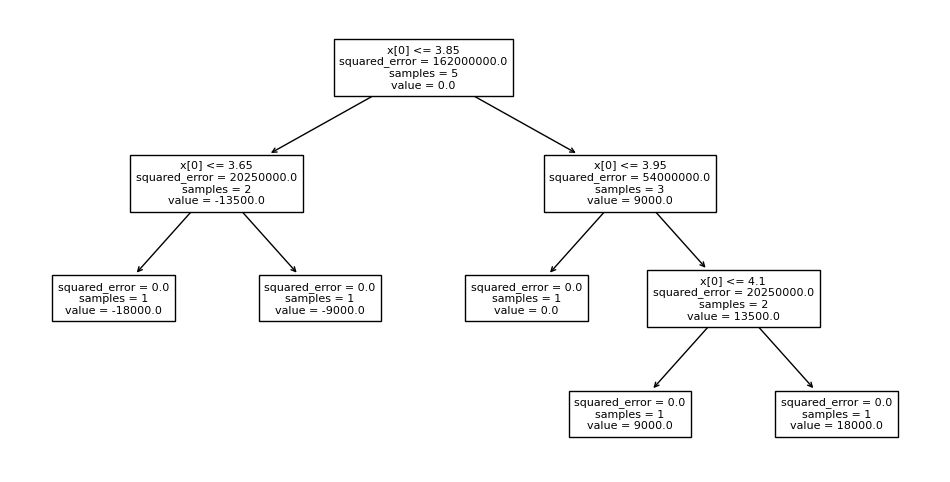

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree2,fontsize=(8))
plt.show()

In [27]:
df['pred3'] = 70000 +0.1* tree2.predict(df['cgpa'].values.reshape(5,1))

In [28]:
df.head()

,cgpa,salary,pred1,err1,pred2,err2,pred3
0,3.5,50000,70000.0,-20000.0,68000.0,-18000.0,68200.0
1,3.8,60000,70000.0,-10000.0,69000.0,-9000.0,69100.0
2,3.9,70000,70000.0,0.0,70000.0,0.0,70000.0
3,4.0,80000,70000.0,10000.0,71000.0,9000.0,70900.0
4,4.2,90000,70000.0,20000.0,72000.0,18000.0,71800.0


## As the count of base learners increases, we approach the true or actual output more closely.
- Observe pred1, pred2, pred3

In [29]:
df['err3'] = df['salary'] - df['pred3']

In [30]:
tree3 = DecisionTreeRegressor(max_leaf_nodes=8)
     

tree3.fit(df['cgpa'].values.reshape(5,1),df['err3'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [31]:
df['pred4'] = 70000 +0.1* tree3.predict(df['cgpa'].values.reshape(5,1))

In [32]:
df.head()

,cgpa,salary,pred1,err1,pred2,err2,pred3,err3,pred4
0,3.5,50000,70000.0,-20000.0,68000.0,-18000.0,68200.0,-18200.0,68180.0
1,3.8,60000,70000.0,-10000.0,69000.0,-9000.0,69100.0,-9100.0,69090.0
2,3.9,70000,70000.0,0.0,70000.0,0.0,70000.0,0.0,70000.0
3,4.0,80000,70000.0,10000.0,71000.0,9000.0,70900.0,9100.0,70910.0
4,4.2,90000,70000.0,20000.0,72000.0,18000.0,71800.0,18200.0,71820.0
